In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df_aug=pd.read_csv('wandbexport.csv')

In [7]:
df_aug

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,aug_images_dir,aug_maps_dir,...,train_enc,train_im,train_maps,avg_loss,avg_train_loss,cc_loss,kldiv_loss,loss,nss_loss,sim_loss
0,Contrast2,crashed,-,heatdh,NaN,2022-12-23T16:20:56.000Z,452487,NaN,NaN,NaN,...,1,augmented/images/Contrast2,augmented/maps/Contrast2,-0.993432,NaN,0.887195,0.231527,NaN,1.641225,0.777743
1,Contrast1,crashed,-,heatdh,NaN,2022-12-23T13:58:51.000Z,461007,NaN,NaN,NaN,...,1,augmented/images/Contrast1,augmented/maps/Contrast1,-0.993692,NaN,0.908262,0.199498,NaN,1.682717,0.798018
2,Mirroring,finished,-,heatdh,NaN,2022-12-22T22:53:44.000Z,8556,NaN,NaN,NaN,...,1,augmented/images/Mirroring,augmented/maps/Mirroring,-0.993488,NaN,0.903158,0.209417,NaN,1.669562,0.786824
3,Shearing3,finished,-,heatdh,NaN,2022-12-22T20:34:39.000Z,8339,NaN,NaN,NaN,...,1,augmented/images/Shearing3,augmented/maps/Shearing3,-0.994368,NaN,0.901985,0.216410,NaN,1.670346,0.784876
4,Shearing2,finished,-,heatdh,NaN,2022-12-22T18:16:46.000Z,8267,NaN,NaN,NaN,...,1,augmented/images/Shearing2,augmented/maps/Shearing2,-0.996347,NaN,0.879745,0.261133,NaN,1.624992,0.752095
5,Inversion,crashed,-,heatdh,NaN,2022-12-22T17:15:30.000Z,535594,NaN,NaN,NaN,...,1,augmented/images/Inversion,augmented/maps/Inversion,-0.996070,NaN,0.903959,0.207815,NaN,1.672216,0.788852
6,Shearing1,finished,-,heatdh,NaN,2022-12-22T15:57:47.000Z,8332,NaN,NaN,NaN,...,1,augmented/images/Shearing1,augmented/maps/Shearing1,-0.994249,NaN,0.900321,0.214372,NaN,1.667478,0.785093
7,JpegCompression1,crashed,-,heatdh,NaN,2022-12-22T15:01:42.000Z,543633,NaN,NaN,NaN,...,1,augmented/images/JpegCompression1,augmented/maps/JpegCompression1,-0.994998,NaN,0.907852,0.199420,NaN,1.681053,0.797498
8,boundaries,finished,-,heatdh,NaN,2022-12-22T13:37:54.000Z,8387,NaN,NaN,NaN,...,1,augmented/images/boundaries,augmented/maps/boundaries,-0.986495,NaN,0.654859,0.566415,NaN,1.201915,0.614977
9,JpegCompression2,crashed,-,heatdh,NaN,2022-12-22T12:47:31.000Z,551674,NaN,NaN,NaN,...,1,augmented/images/JpegCompression2,augmented/maps/JpegCompression2,-0.995331,NaN,0.905290,0.204136,NaN,1.675333,0.793249


In [20]:
kldiv_opt = 0.24
cc_opt = 0.9064

In [8]:
df_aug = df_aug[["Name","cc_loss","kldiv_loss","nss_loss","sim_loss"]]

In [9]:
df_aug.head()

,Name,cc_loss,kldiv_loss,nss_loss,sim_loss
0,Contrast2,0.887195,0.231527,1.641225,0.777743
1,Contrast1,0.908262,0.199498,1.682717,0.798018
2,Mirroring,0.903158,0.209417,1.669562,0.786824
3,Shearing3,0.901985,0.216410,1.670346,0.784876
4,Shearing2,0.879745,0.261133,1.624992,0.752095


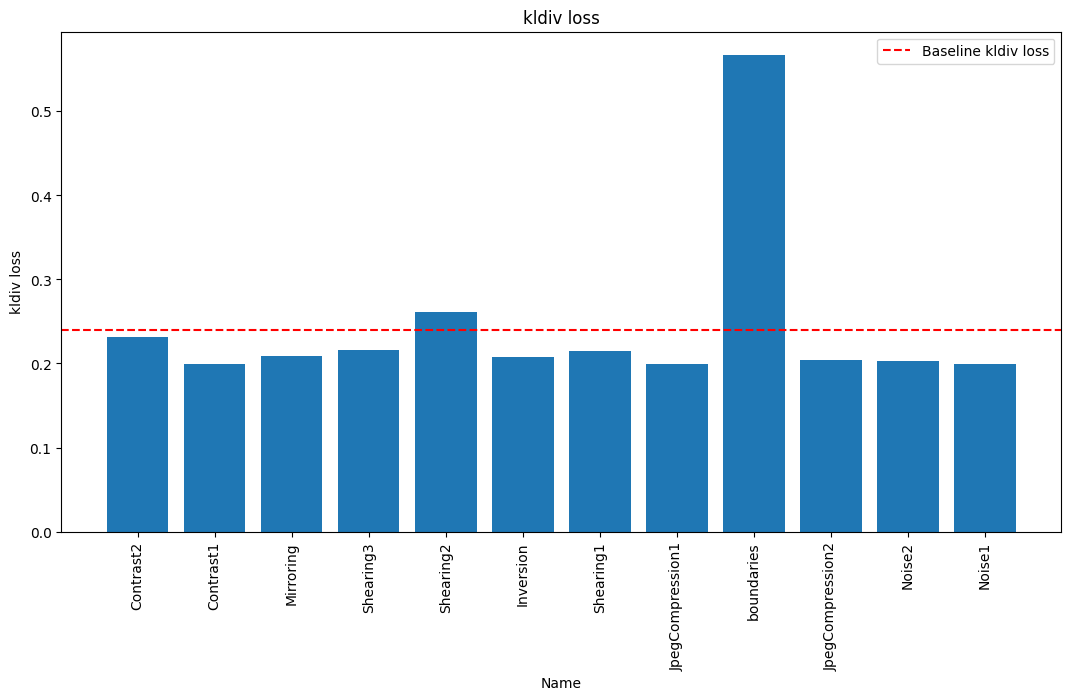

In [21]:
# plot name to kldiv loss as bar chart
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_aug["Name"],df_aug["kldiv_loss"])
plt.axhline(y=kldiv_opt, color='r', linestyle='dashed', label='Baseline kldiv loss')
ax.set_ylabel('kldiv loss')
ax.set_xlabel('Name')
# tilt the x axis labels
plt.xticks(rotation=90)
ax.set_title('kldiv loss')
plt.legend()
plt.show()



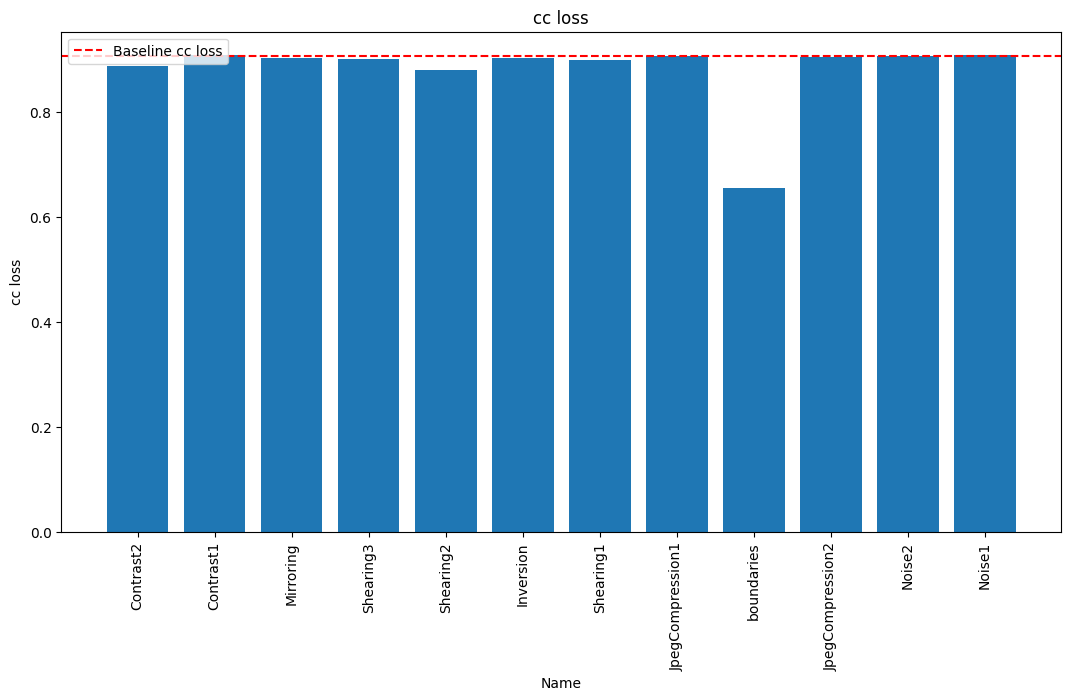

In [22]:
# same for cc loss
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_aug["Name"],df_aug["cc_loss"])
plt.axhline(y=cc_opt, color='r', linestyle='dashed', label='Baseline cc loss')
ax.set_ylabel('cc loss')
ax.set_xlabel('Name')
# tilt the x axis labels
plt.xticks(rotation=90)
ax.set_title('cc loss')
plt.legend()
plt.show()
